In [14]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

# Load the data 

In [2]:
data = pd.read_csv('housing.csv')

# Descriptive Analysis of the data

In [3]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200


In [4]:
data.shape

(20640, 10)

In [5]:
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [6]:
data.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000


# Exploratory Data Analysis 

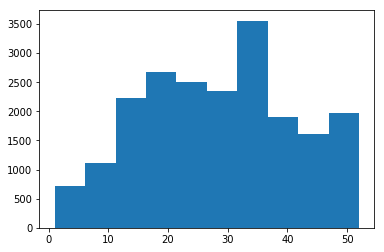

In [10]:
plt.hist(data.housing_median_age)
plt.show()

Most of the houses are around 35 years old

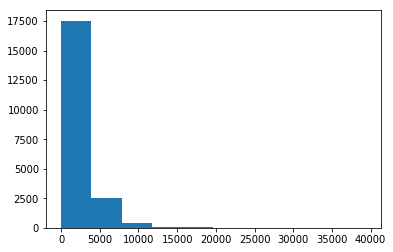

In [11]:
plt.hist(data.total_rooms)
plt.show()

In [12]:
data.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
ocean_proximity         0
median_house_value      0
dtype: int64

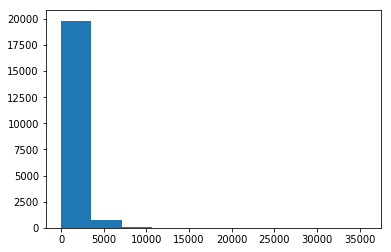

In [13]:
plt.hist(data.population)
plt.show()

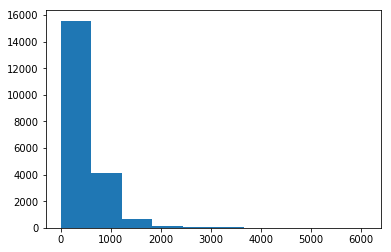

In [15]:
plt.hist(data.households)
plt.show()

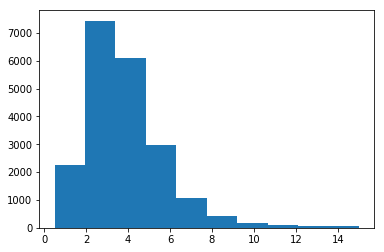

In [16]:
plt.hist(data.median_income)
plt.show()

Most of the income is within the range of 2 to 5

In [18]:
data.groupby('ocean_proximity').size()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
ISLAND           5
NEAR BAY      2290
NEAR OCEAN    2658
dtype: int64

# Assigning X and Y

In [19]:
X = data[['longitude','latitude','housing_median_age','total_rooms','total_bedrooms','population','households','median_income','ocean_proximity']]
Y = data[['median_house_value']]

# Imputing Missing Values 

In [20]:
X.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
ocean_proximity         0
dtype: int64

In [21]:
X.total_bedrooms.describe()

count    20433.000000
mean       537.870553
std        421.385070
min          1.000000
25%        296.000000
50%        435.000000
75%        647.000000
max       6445.000000
Name: total_bedrooms, dtype: float64

In [22]:
#Storing all NaN values to later check if they are replaced by means
nans = lambda df: df[df.isnull().any(axis=1)]
nans(X)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
290,-122.16,37.77,47,1256,NaN,570,218,4.3750,NEAR BAY
341,-122.17,37.75,38,992,NaN,732,259,1.6196,NEAR BAY
538,-122.28,37.78,29,5154,NaN,3741,1273,2.5762,NEAR BAY
563,-122.24,37.75,45,891,NaN,384,146,4.9489,NEAR BAY
696,-122.10,37.69,41,746,NaN,387,161,3.9063,NEAR BAY
738,-122.14,37.67,37,3342,NaN,1635,557,4.7933,NEAR BAY
1097,-121.77,39.66,20,3759,NaN,1705,600,4.7120,INLAND
1350,-121.95,38.03,5,5526,NaN,3207,1012,4.0767,INLAND
1456,-121.98,37.96,22,2987,NaN,1420,540,3.6500,INLAND
1493,-122.01,37.94,23,3741,NaN,1339,499,6.7061,NEAR BAY


In [23]:
X['total_bedrooms'].fillna(X['total_bedrooms'].mean(), inplace=True)

C:\Users\Umaima\Anaconda3\lib\site-packages\pandas\core\generic.py:5434: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [24]:
X.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
ocean_proximity       0
dtype: int64

In [41]:
X.iloc[['20484','3529']]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
20484,-118.72,34.28,17,3051,537.870553,1705,495,5.7376,<1H OCEAN
3529,-118.53,34.26,18,3674,537.870553,1590,550,8.1760,<1H OCEAN


# Encode Categorical Data 

In [42]:
# The 'get_dummies()' function is used to convert categorical variable into dummy/indicator variables. 
# Data of which to get dummy indicators.
# Shortcut of importing OneHotEncoder, instead of importing label_encoder and one_hot_encoder and using fit_transform.

ohe = pd.get_dummies(X)
print (ohe.columns)
print (ohe.head())

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND',
       'ocean_proximity_ISLAND', 'ocean_proximity_NEAR BAY',
       'ocean_proximity_NEAR OCEAN'],
      dtype='object')
   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                  41          880           129.0   
1    -122.22     37.86                  21         7099          1106.0   
2    -122.24     37.85                  52         1467           190.0   
3    -122.25     37.85                  52         1274           235.0   
4    -122.25     37.85                  52         1627           280.0   

   population  households  median_income  ocean_proximity_<1H OCEAN  \
0         322         126         8.3252                          0   
1        2401        1138         8.3014                          0   
2         496 

In [43]:
X = ohe

In [44]:
X.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41,880,129.0,322,126,8.3252,0,0,0,1,0
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,0,0,0,1,0
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,0,0,0,1,0
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,0,0,0,1,0
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,0,0,0,1,0


# Splitting the data into test and train

In [45]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size=0.7, random_state = 1)

C:\Users\Umaima\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [46]:
print(X.shape)
print(Y.shape)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

(20640, 13)
(20640, 1)


((14447, 13), (14447, 1), (6193, 13), (6193, 1))

In [47]:
x_train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
5592,-118.26,33.80,41,2004,481.0,1658,456,3.1779,1,0,0,0,0
2110,-119.75,36.75,49,2331,460.0,1290,477,2.5111,0,1,0,0,0
13901,-116.56,34.06,15,6928,1529.0,2568,1075,2.5405,0,1,0,0,0
18425,-121.83,37.26,7,3609,751.0,1739,682,4.5033,1,0,0,0,0
6475,-118.08,34.09,33,2557,578.0,1715,530,2.9196,1,0,0,0,0


# Applying Linear Regression

In [48]:
#Using Linear Regression

from sklearn.linear_model import LinearRegression

lm = LinearRegression()

lm.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [49]:
lm.coef_, lm.intercept_

(array([-2.66831086e+04, -2.51984172e+04,  1.07342532e+03, -6.20610501e+00,
         8.70871155e+01, -3.70705643e+01,  6.17633824e+01,  3.97626761e+04,
         2.17723633e+08,  2.17684641e+08,  2.17879228e+08,  2.17720716e+08,
         2.17729582e+08]), -219990070.07222775)

In [50]:
lm.score(x_train,y_train)#R2

0.6487177514279094

In [51]:
predictions = lm.predict(x_test)

In [52]:
from sklearn import metrics
# calculate MAE, MSE, RMSE
print("MAE : ", metrics.mean_absolute_error(y_test, predictions))
print("MSE : ", metrics.mean_squared_error(y_test, predictions))
print("RMSE : ",np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE :  50027.964470686056
MSE :  4776426539.815388
RMSE :  69111.69611444497
